# Fit Hologram parameters For CTIO

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 16th 2021

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

# constants

- all transverse physical coordinates are in mm and relative to beam optical center (at CCD center)

In [3]:
# conversion in good inits
u_radtodeg=180.0/np.pi
u_degtorad=np.pi/180.
u_mtomm=1e3

- all constants are refered as $c\_$

In [4]:
c_F=13.7*0.9*u_mtomm # Auxtel Focla length # ou 13.7m

In [5]:
c_F

12330.0

In [6]:
c_Z1=56. # mm, distance between hologram and source plane during holo recording
c_Z0=56. # mm, distance between hologram and CCD plane for observations 

In [7]:
c_d1=13.5 # mm, disntance between the sources during recording 

In [8]:
c_x1_0=7  # mm , x-coordinates of the hologram optical center in the CCD ref frame
c_y1_0=5 # mm , y-coordinate of the hologram optical center in the CCD ref frame

In [9]:
c_alpha0=10 #degree , angle of rotation of hologram source axis wrt CCD  

# Functions

- $(X,Y)$ : coordinates in CCD frame with telecope optical center as the origin
- $(x,y)$ : coordinates in hologram frame with telecope optical center as the origin the same reference axis as the CCD
- $(x_1,y_1)$ : coordinates in hologram reference frame, with telecope optical center as the origin, such the two sources A $(x_1(A),y_1(A))$ and B $(x_1(B),y_1(B))$ have coordinates:
$$
x_1(A)= x_1 (0)-d_1/2 
$$
$$
y_1(A)= y_1(0)
$$
$$
x_1(B)= x_1 (0)+d_1/2 
$$
$$
y_1(B)= y_1(0)
$$

In [10]:
def XYtoxy(XY,Z):
    """
    XYtoxy(XY,Z): convert coordinates in CCD plane to coordinates in hologram frame (same ref axis as CCD)
    
    input parameters
    - XY : numpy array of the 2-coordinates in CCD in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - xy : numpy array of the 2-coordinates in  in mm
    """
    XY=np.array(XY)
    xy=(1-Z/c_F)*XY
    
    return xy  

In [11]:
def xytoXY(xy,Z):
    """
    xytoXY(xy,Z): convert coordinates in hologram frame (same ref axis as CCD) to CCD frame
    
     input parameters
    - xy : numpy array of the 2-coordinates in  in mm
    - Z : distance between hologram and CCD in mm (positive)
    
    output parameter 
    - XY : numpy array of the 2-coordinates in CCD in mm
    
    """
    xy=np.array(xy)
    XY=1./(1-Z/c_F)*xy
    
    return XY  

In [12]:
def xytox1y1(xy,alpha,x0,y0):
    """
    xytox1y1(xy,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    - (x0,y0) : coordinate of O1 in CCD axis frame
    
    output parameter 
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    x=xy[0]-x0
    y=xy[1]-y0
    
    x1y1=np.array([cos_alpha*x+sin_alpha*y,-sin_alpha*x+cos_alpha*y])
    return x1y1

In [13]:
def xytox1y1_2D(x,y,alpha,x0,y0):
    """
    xytox1y1_2d(x,y,alpha): convert coordinates in hologram frame (same ref axis as CCD) to an instrinsic hologram frame
    by an angle alpha (goal new axis should be x1 axis parallel to sources A,B)
    
    input parameters
    - x,y : 2D-numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
    - alpha : angle in degree
    
    output parameter 
    - x1,y1 : mm, 2D-numpy array of the 2-coordinates in the intrinsic hologram frame
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x=x-x0
    y=y-y0
    
    x1=cos_alpha*x+sin_alpha*y
    y1=-sin_alpha*x+cos_alpha*y
    return x1,y1

In [14]:
def x1y1toxy(x1y1,alpha,x0,y0):
    """
    x1y1toxy(x1y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1y1 : mm, numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - xy : numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    x1=x1y1[0]
    y1=x1y1[1]
    
    xy=np.array([cos_alpha*x1-sin_alpha*y1+x0,sin_alpha*x1+cos_alpha*y1+y0])
    return xy

In [15]:
def x1y1toxy_2D(x1,y1,alpha,x0,y0):
    """
    x1y1toxy_2D(x1,y1,alpha): convert coordinates in the intrinsic hologram frame  to the hologram frame 
    with same axis as CCD
    by an angle alpha 
    
    input parameters
    - x1,y1 : mm, 2D numpy array of the 2-coordinates in the intrinsic hologram frame  
    - alpha : angle in degree
    
    output parameter 
     - x,y : 2D numpy array of the 2-coordinates in hologram which ref axis are those of CCD mm
   
    
    """
    
    cos_alpha=np.cos(alpha*u_degtorad)
    sin_alpha=np.sin(alpha*u_degtorad)
    
    
    x=cos_alpha*x1-sin_alpha*y1+x0
    y=sin_alpha*x1+cos_alpha*y1+y0
    return x,y

In [16]:
def dist1_to_source(xy,xy_s):
    """
    dist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - xy   : mm, 1D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - xy_s : mm, 1D-numpy array of the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the 3d distance 
    
    """
    
    return np.sqrt(c_Z1**2+ (xy[0]-xy_s[0])**2+ (xy[1]-xy_s[1])**2)

In [17]:
def ddist1_to_source(x,y,x_s,y_s):
    """
    ddist1_to_source(xy,xy_s) : distance between a point M(x,y) to a source S(x_S,y_s) at hologram recording phase
    
    more efficient than dist1_to_source(xy,xy_s) because x,y are 2D numpy arrays.
    
    The alpha hologram rotation angle is not important provided both point M and source S have the same reference axis
    
     input parameters
    - x,y   : mm, 2D-numpy array of the 2-coordinates of point M in the  hologram frame  
    - x,y_s : mm, scalar the 2-coordinates of the source in the  hologram frame  
    
    
    output parameter:
    return the distance in 3D in a 2D numpy array
    
    Note : Either (x,y) are 2 2D-numpy array and (x_s,y_s) are 2 scalars 
           Or  (x,y) are 2 scalars and (x_s,y_s) are 2 2D-numpy arrays
    
    """
    
    return np.sqrt(c_Z1**2 + (x-x_s)**2+ (y-y_s)**2)

In [18]:
def d_phi(x1y1):
    """

    
    d_phi(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    d_phi=d1_A-d1_B
   
    
    return d_phi

In [19]:
def dd_phi(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    dd_phi=dd1_A-dd1_B
    
    return dd_phi # in a 2D numpy array

In [20]:
def d_alpha(x1y1):
    """
    d_alpha(x1y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    
    input parameters
    - x1y1   : mm, numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
    
     
    output parameter:
    return the angle d_alpha in degree
    
    """
    
    
    x1y1_A=np.array([-c_d1/2, 0]) # coordinate of source A
    x1y1_B=np.array([+c_d1/2, 0]) # coordinate of source B
    
    d1_A=dist1_to_source(x1y1,x1y1_A)  # distance to source A
    d1_B=dist1_to_source(x1y1,x1y1_B)  # distance to source B
    
    
    num_tan_dalpha= d1_B*(x1y1[1]-x1y1_A[1])-d1_A*(x1y1[1]-x1y1_B[1])
    den_tan_dalpha= d1_B*(x1y1[0]-x1y1_A[0])-d1_A*(x1y1[0]-x1y1_B[0])
    
    tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha

In [21]:
def dd_alpha(x1,y1):
    """
    dd_alpha(x1,y1) : angle d_alpha of hologram dispersion axis un hologram intrinsic reference frame
    
    more efficient than d_alpha(x1y1,x1y1_0) because x1,y1 are a 2D numpy array
    
    input parameters are 2D numpy array
    - x1,y1   : mm, 2D numpy array of the 2-coordinates of point M in the  intrinsic hologram frame  
     
    
    output parameter:
    return the angle d_alpha in degree in a 2D numpy array
    
    
    Notes :
     - Either (x1,y1) may be 2 2D-numpy arrays and x1_0,y1_0 two scalars : to get the d_alpha(x1,y1)
     - Or fix (x1,y1) as two scalars where the angle is measured and (x1_0,y1_0) are 2 2D numpy arrays
     for scanning in chi2 function the best position for parameters (x1_0,y1_0) 
    
    """
    
    
    x1_A=-c_d1/2 # coordinate of source A
    y1_A=0.        # coordinate of source A
    
    x1_B=c_d1/2 # coordinate of source B
    y1_B=0        # coordinate of source B
    
    dd1_A=ddist1_to_source(x1,y1,x1_A,y1_A)  # distance to source A in a 2D numpy array
    dd1_B=ddist1_to_source(x1,y1,x1_B,y1_B)  # distance to source B
    
    
    num_tan_dalpha= dd1_B*(y1-y1_A)-dd1_A*(y1-y1_B)
    den_tan_dalpha= dd1_B*(x1-x1_A)-dd1_A*(x1-x1_B)
    
    tan_dalpha=- num_tan_dalpha/den_tan_dalpha
    
    d_alpha=u_radtodeg*np.arctan(tan_dalpha)
    
    return d_alpha # in a 2D numpy array

# Check formula

In [22]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

In [23]:
X = np.linspace(XMIN, XMAX, NPIX)
Y = np.linspace(YMIN, YMAX, NPIX)
XX, YY = np.meshgrid(X, Y, sparse=False)

### Constant phase

In [24]:
Z_Phi_holo=dd_phi(XX,YY)

In [25]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothecy
zoom=1.5
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_alpha0,c_x1_0,c_y1_0)
Z_Phi_ccd=dd_phi(xx1_holo,yy1_holo)

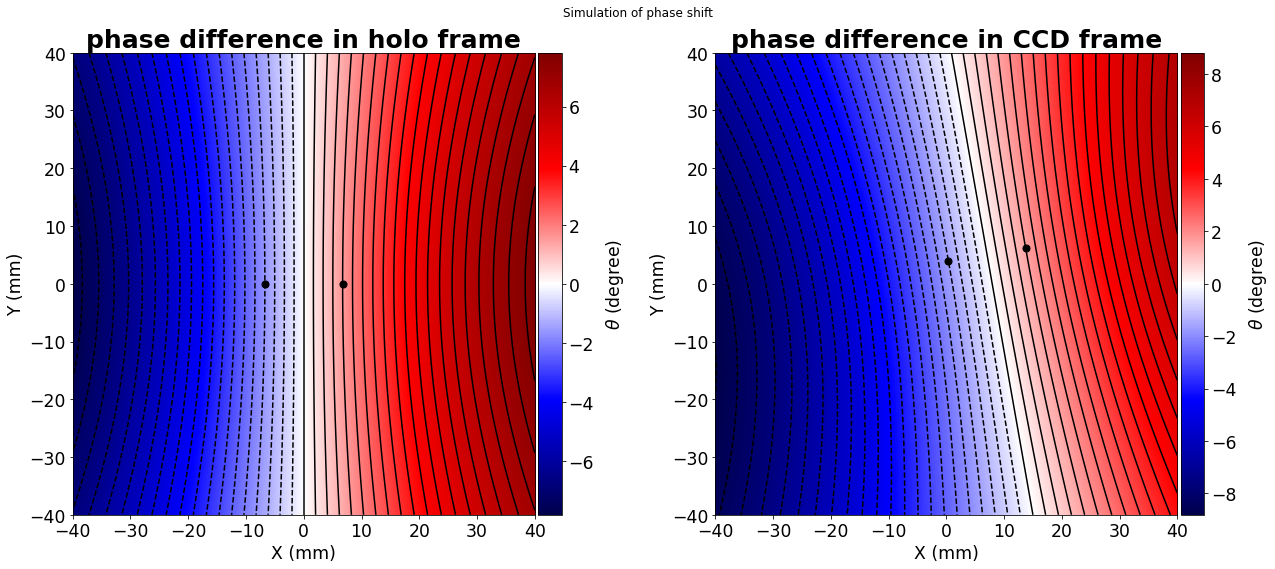

In [26]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Phi_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Phi_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("phase difference in holo frame",fontweight="bold",fontsize=25)



ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
maxPhi=np.max(np.abs(Z_Phi_ccd))

im2=ax2.imshow(Z_Phi_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX),vmin=-maxPhi,vmax=maxPhi)
h2 = ax2.contour(X_ccd,Y_ccd,Z_Phi_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)



xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)


ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("phase difference in CCD frame",fontweight="bold",fontsize=25)

plt.suptitle("Simulation of phase shift")
plt.tight_layout()

### Alpha angle

In [27]:
Z_Ang_holo=dd_alpha(XX,YY)

In [28]:
X_ccd = np.linspace(XMIN, XMAX, NPIX)
Y_ccd = np.linspace(YMIN, YMAX, NPIX)
XX_ccd, YY_ccd = np.meshgrid(X_ccd, Y_ccd, sparse=False)

# homothecy
zoom=1.5
xx_holo=XYtoxy(XX_ccd,c_Z1*zoom) 
yy_holo=XYtoxy(YY_ccd,c_Z1*zoom) 

# rotation
(xx1_holo,yy1_holo)=xytox1y1_2D(xx_holo,yy_holo,c_alpha0,c_x1_0,c_y1_0)
Z_Ang_ccd=dd_alpha(xx1_holo,yy1_holo)

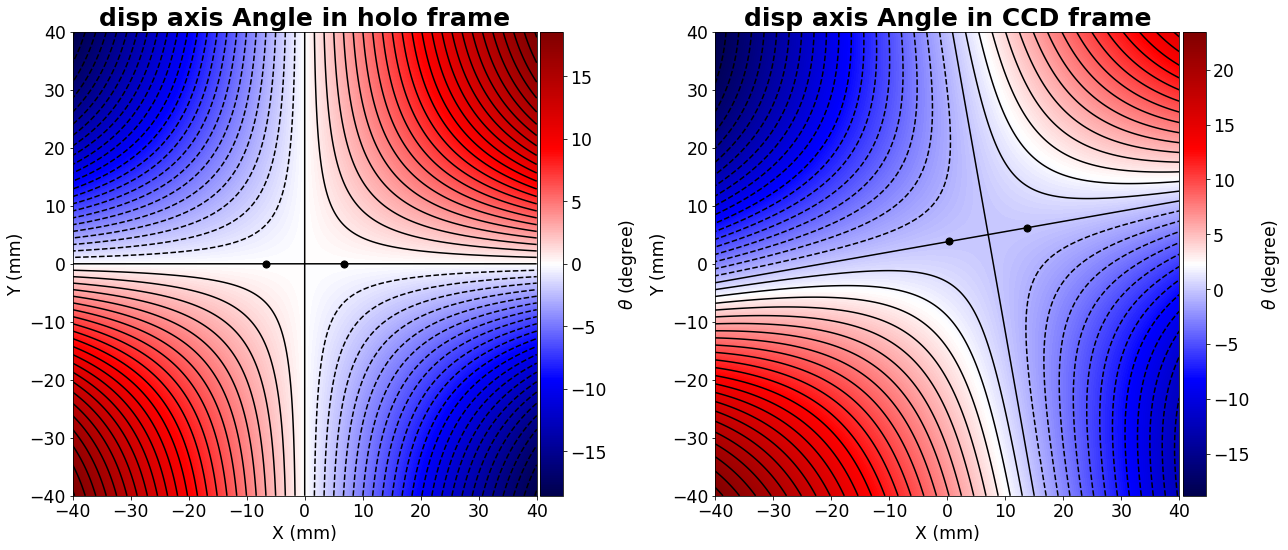

In [29]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang_holo,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang_holo,levels=50,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

ax1.scatter(xy1_A[0],xy1_A[1],marker="o",color="k",s=50)
ax1.scatter(xy1_B[0],xy1_B[1],marker="o",color="k",s=50)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("disp axis Angle in holo frame",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=50,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)



xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)


XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="k",s=50)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="k",s=50)


ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("disp axis Angle in CCD frame",fontweight="bold",fontsize=25)


plt.tight_layout()

# Estimation of hologram parameters

## Random points

In [30]:
NumberofPoints=50
Nxsim=np.random.randint(NPIX, size=(NumberofPoints))
Nysim=np.random.randint(NPIX, size=(NumberofPoints))
Xsim=X_ccd[Nxsim]
Ysim=Y_ccd[Nysim]

## Simulated Measurement

In [31]:
sig_alpha=0.01 # measurement error on angle in degree

In [32]:
# group the data points
XYsim=np.array(list(zip(Xsim,Ysim)))

In [33]:
# convert coordinates in hologram frame (same orientation as CCD)
xysim=XYtoxy(XYsim,c_Z1*zoom)

In [34]:
# apply true rotation to have coordinates in intrisic hologram frame
x1y1sim=np.zeros(xysim.shape)
for idx in np.arange(NumberofPoints):
    x1y1sim[idx,:]=xytox1y1(xysim[idx],c_alpha0,c_x1_0,c_y1_0)

In [35]:
# calculate d_alpha for the data (in intrinsic hologram ref frame) in degree
d_alpha=dd_alpha(x1y1sim[:,0],x1y1sim[:,1])

In [36]:
# simulate measurement of angle in CCD frame
Zsim=c_alpha0+d_alpha+np.random.normal(loc=0,scale=sig_alpha)

## Plot simulated points

Text(0.5, 1.0, 'Simulation in CCD frame')

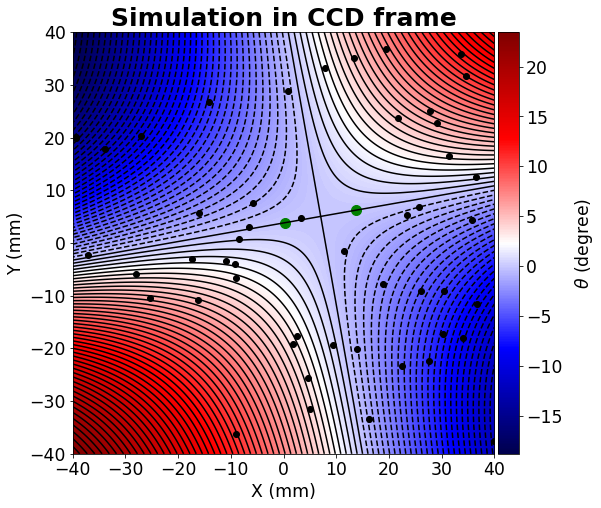

In [37]:
fig = plt.figure(figsize=(8,8))

ax2 = fig.add_subplot(111)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Ang_ccd,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X_ccd,Y_ccd,Z_Ang_ccd,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

xy1_A=np.array([-c_d1/2,0])
xy1_B=np.array([c_d1/2,0])

xy_A = x1y1toxy(xy1_A,c_alpha0,c_x1_0,c_y1_0)
xy_B = x1y1toxy(xy1_B,c_alpha0,c_x1_0,c_y1_0)

XY_A = xytoXY(xy_A,c_Z1*zoom)
XY_B = xytoXY(xy_B,c_Z1*zoom)

ax2.scatter(XY_A[0],XY_A[1],marker="o",color="g",s=100)
ax2.scatter(XY_B[0],XY_B[1],marker="o",color="g",s=100)

ax2.scatter(X[Nxsim],Y[Nysim],marker="o",color="k")

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("Simulation in CCD frame",fontweight="bold",fontsize=25)



# Chi2 function

In [38]:
def chi2(Xdata,Ydata,Zdata,X0,Y0,alpha,Z,sig=0.05,Npar=2):
    """
    Chi2 per degree of freedom
    
    - input parameters
      - Xdata,Ydata,Zdata :three 1D-numpy array: Xdata,Ydata coordinates of order zero, Zdata angle measured
      - X0,Y0 2 2D numpy arrays of unknown parameters to fit (optical center of hologram in CCD frame)
      - alpha,Z other parameters
      - sig : experimental error on angle
      - Npar : number of parameter to use in degrees of freedom
      
    - ouput
     - 2D numpy array of chi2 representing the chi2
     
    """
    
   
    N=len(Xdata)
    chi2=np.zeros(X0.shape)
 
    # loop on data
    for idx in np.arange(N):
        
        X=Xdata[idx] # scalar
        Y=Ydata[idx]
        
        XY=np.array([X,Y])
        
        # homothecie according the Z assumption
        xy=XYtoxy(XY,Z)
    
        # rotation according the alpha assumption
        x1y1=xytox1y1(xy,alpha,X0,Y0)
        
        d_alpha=dd_alpha(x1y1[0],x1y1[1])
        
        # angle in the model
        angle_mod=alpha+d_alpha
        
        #angle measured
        angle_mes=Zdata[idx]
    
        chi2+=(angle_mod-angle_mes)**2/sig**2
        
    return chi2/(N-Npar) 

Text(0.5, 1.0, 'distrib of holo angle')

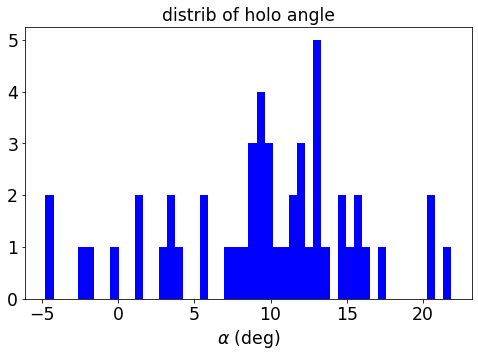

In [39]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.hist(Zsim,bins=50,facecolor="b");
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_title("distrib of holo angle")

## Calculation of chi2

In [40]:
the_chi2=chi2(Xsim,Ysim,Zsim,XX_ccd,YY_ccd,c_alpha0,c_Z1*zoom,sig=sig_alpha,Npar=2)

## Plot

In [41]:
import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-1,1)) 

[562] [587]
7.0070070070070045 5.005005005005003


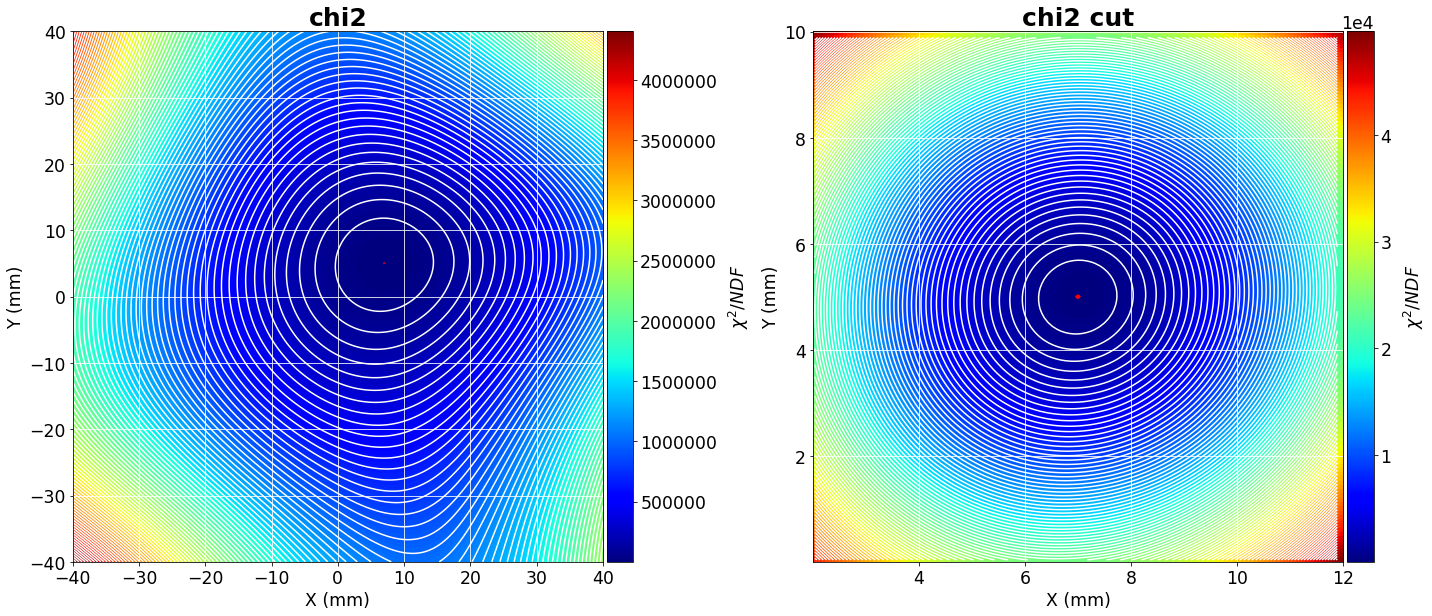

In [42]:
fig = plt.figure(figsize=(20,10))


ax1 = fig.add_subplot(121)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)
ax1.grid(color="w")

the_chi2min=the_chi2.min()

idx_y_chi2min,idx_x_chi2min=np.where(the_chi2==the_chi2min)
print(idx_y_chi2min,idx_x_chi2min)
x_chi2min=X_ccd[idx_x_chi2min][0]
y_chi2min=Y_ccd[idx_y_chi2min][0]
print(x_chi2min,y_chi2min)

ax2 = fig.add_subplot(122)
xmin=x_chi2min-5
xmax=x_chi2min+5
ymin=y_chi2min-5
ymax=y_chi2min+5

ibinx=np.where(np.logical_and(X_ccd>=xmin,X_ccd<=xmax))[0]
ibiny=np.where(np.logical_and(Y_ccd>=ymin,X_ccd<=ymax))[0]
chi2_cut=the_chi2[ibiny.min():ibiny.max(), ibinx.min():ibinx.max()]
X_cut=X[ibinx.min():ibinx.max()]
Y_cut=X[ibiny.min():ibiny.max()]


divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
im2=ax2.imshow(chi2_cut,origin="lower",cmap="jet",extent=(xmin,xmax,ymin,ymax))
h2 = ax2.contour(X_cut,Y_cut,chi2_cut,levels=100,colors='w')
h2b = ax2.contour(X_cut,Y_cut,chi2_cut,levels=[2.30+chi2_cut.min()],colors='r',linewidths=2)
cbar2=fig.colorbar(im2,cax=cax2,format=cbformat)
cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
#cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
#cbformat.set_powerlimits((-2,4))   
ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("chi2 cut",fontweight="bold",fontsize=25)
ax2.grid(color="w")

plt.tight_layout()
plt.show()

# Parameter Grid

In [43]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [44]:
Ncol=4
Nrow=4
Nalpha=Nrow*Ncol
alpha_range=5
alpha_min=c_alpha0-alpha_range
alpha_max=c_alpha0+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)

<ipython-input-45-5ad844d0420d>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle("Simulation : hologram parameter search",Y=1)


Text(0.5, 1, 'Simulation : hologram parameter search')

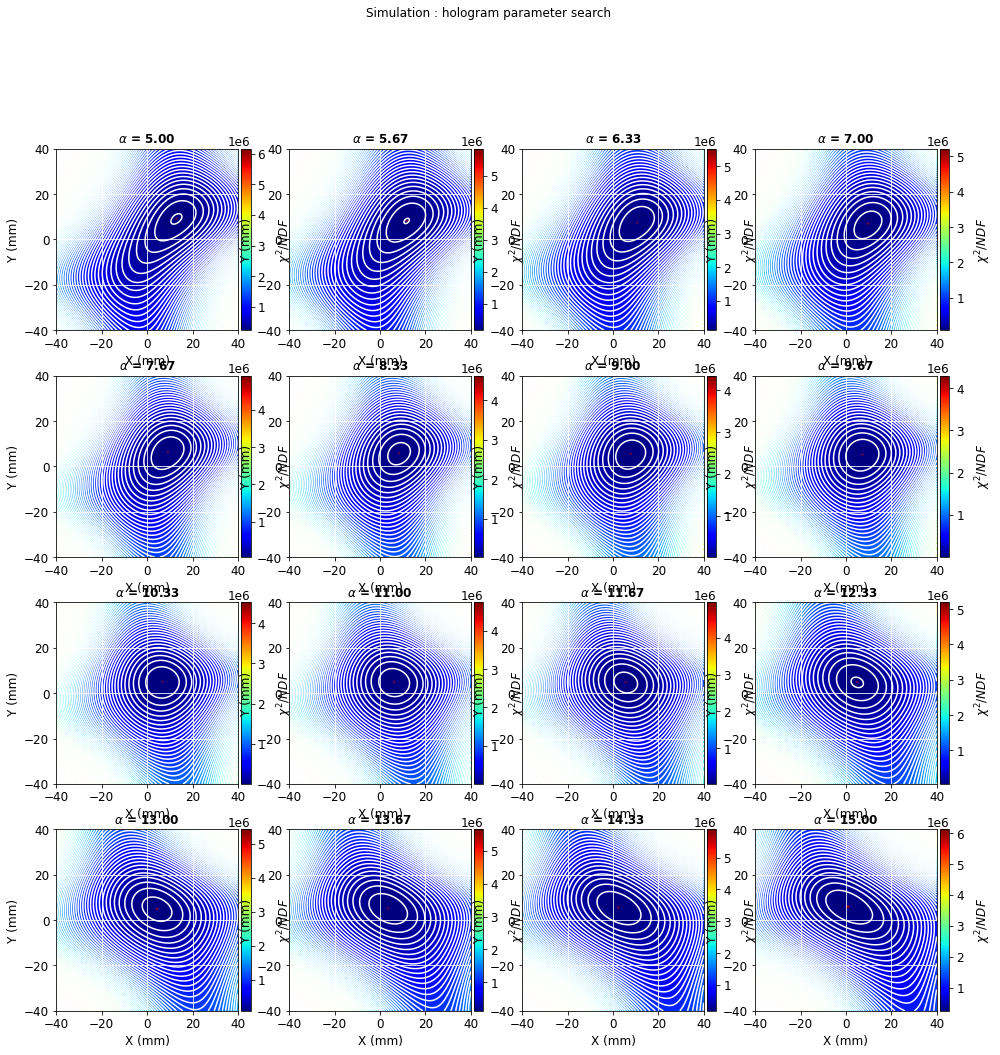

In [45]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha)
the_locchi2min = []
# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xsim,Ysim,Zsim,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()  # value of chi2min
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("Simulation : hologram parameter search",Y=1)
#plt.tight_layout()


In [46]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

Text(0.5, 1.0, '$simulation : \\chi^2$ vs holo angle $\\alpha$')

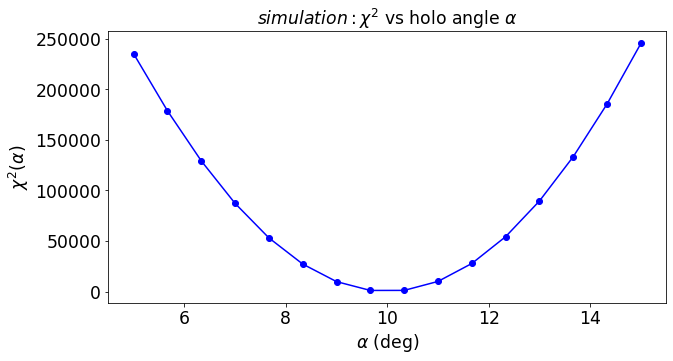

In [47]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("$simulation : \chi^2$ vs holo angle $\\alpha$")

### Find where we have the chi2 min

In [48]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]
idx_min

7

In [49]:
found_angle_1=alpha_values[idx_min]
found_angle_1

9.666666666666666

In [50]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [51]:
X_ccd[idx_chi2min_x][0]

7.247247247247245

In [52]:
Y_ccd[idx_chi2min_y][0]

5.085085085085083

# With CTIO data

In [53]:
from IPython.display import Image
#Image(filename='figures/amas_ouvert.png') 

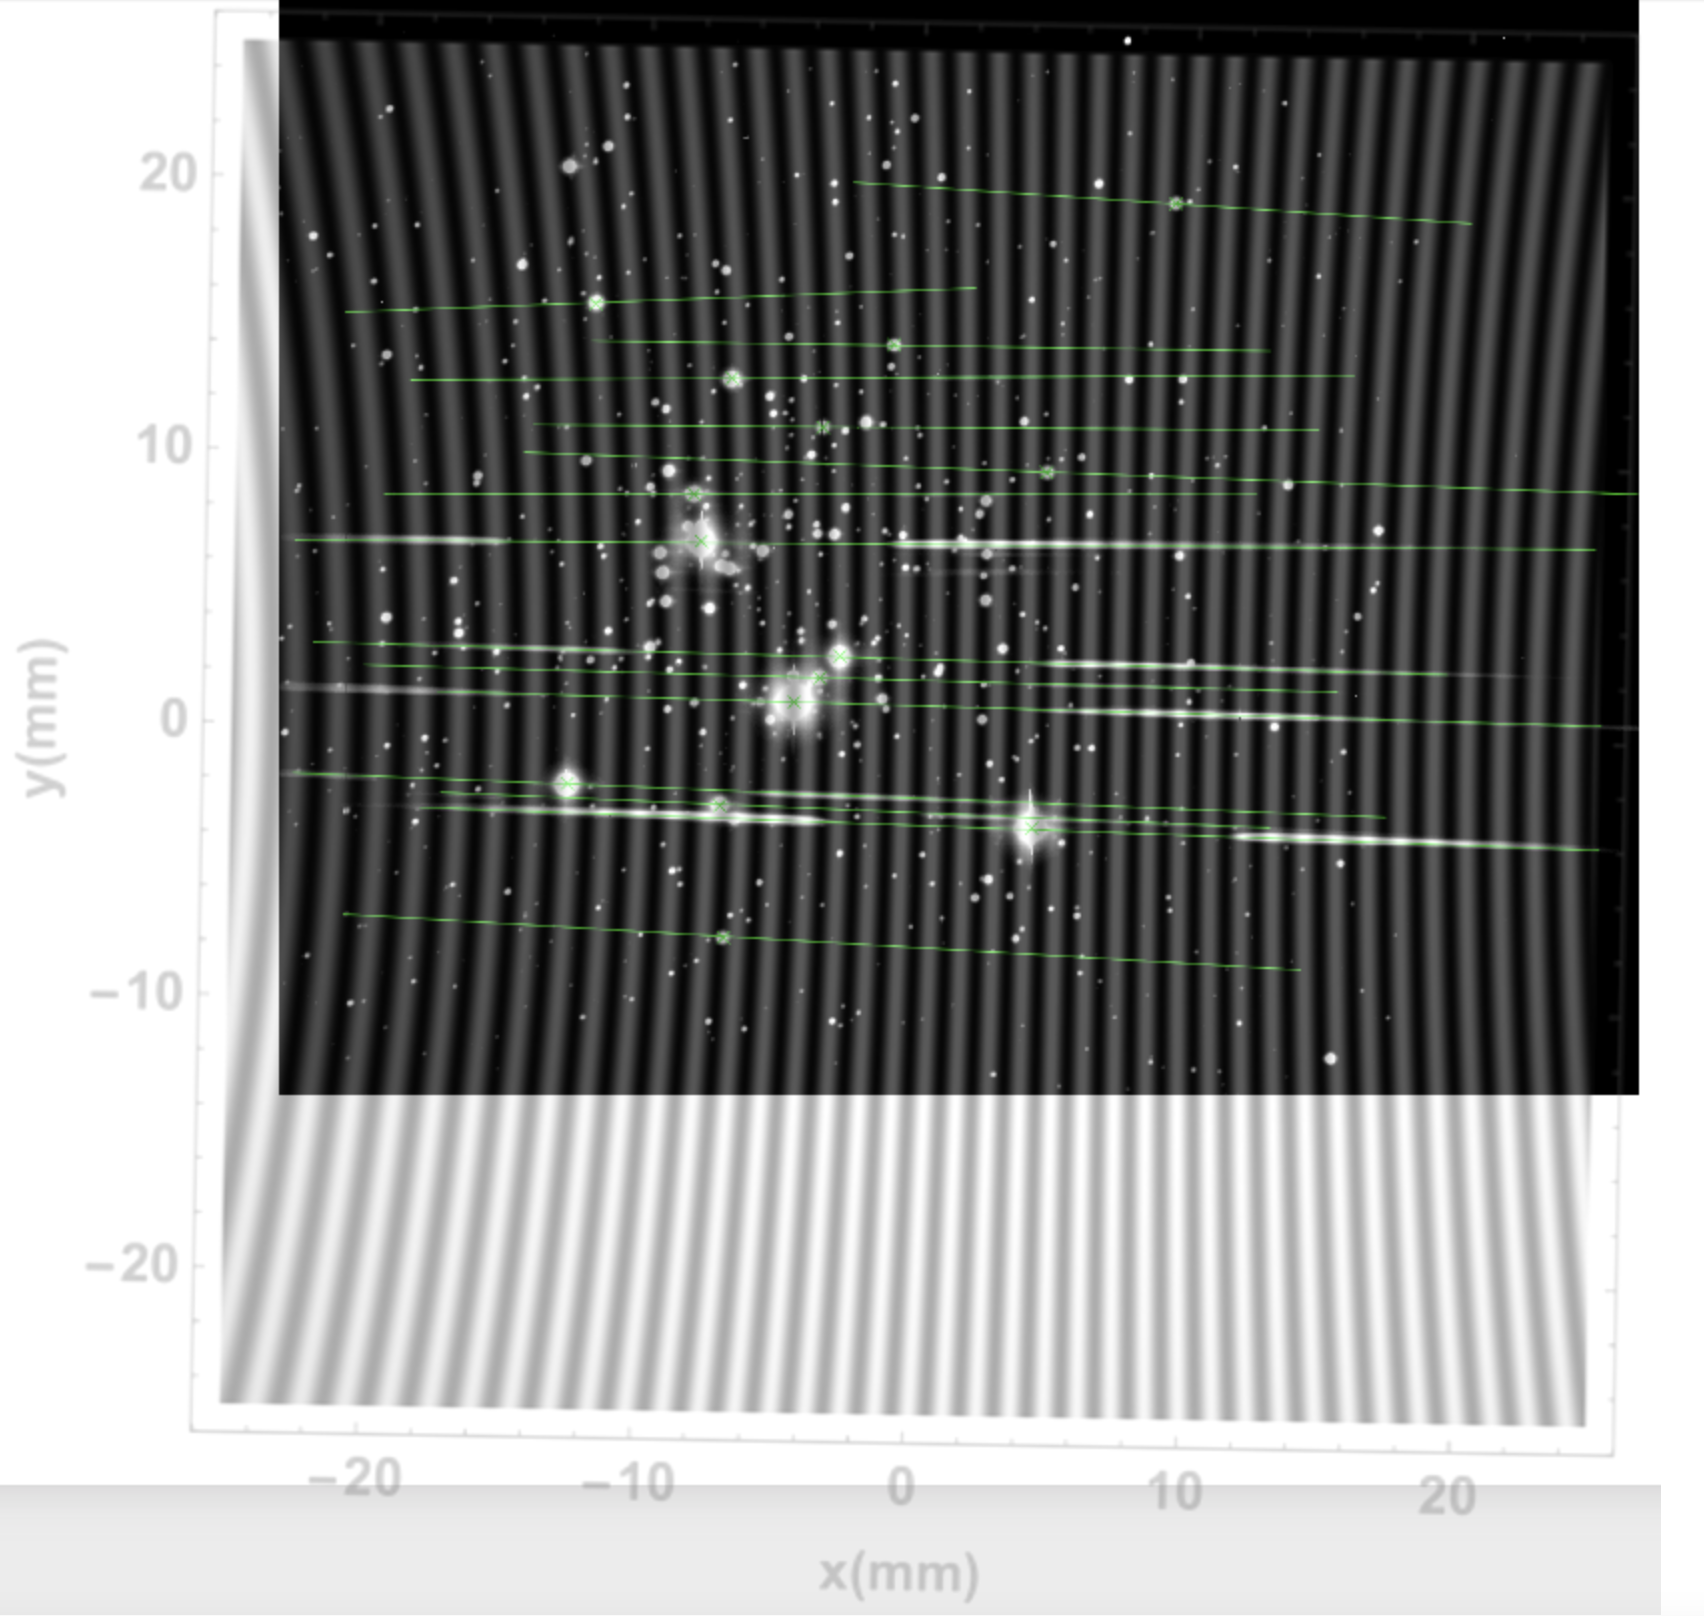

In [54]:
Image(filename='figures/AmasOuvert_holophilines.png')

## read excel file

In [55]:
df=pd.read_excel("../data/orientations-holo.xlsx",index_col=None,header=0)

In [56]:
df

Xp    Yp    Xq    Yq    Xc    Yc    Dx  Dy     alpha  X (mm)   Y(mm)  \
0   299   576  1955   515  1132   544  1656 -61 -0.036819   2.592 -11.520   
1   200  1221  1623  1228   682  1223  1423   7  0.004919  -8.208   4.776   
2   103  1323  1051  1359   479  1337   948  36  0.037956 -13.080   7.512   
3    29   982  1985   966   638   977  1956 -16 -0.008180  -9.264  -1.128   
4   868  1519  1797  1457  1352  1487   929 -62 -0.066640   7.872  11.112   
5    56   828  1826   777   845   805  1770 -51 -0.028806  -4.296  -5.256   
6   134   414  1538   332   669   383  1404 -82 -0.058338  -8.520 -15.384   
7   473  1280  1496  1264   927  1274  1023 -16 -0.015639  -2.328   6.000   
8    21   629  1673   562   436   612  1652 -67 -0.040535 -14.112  -9.888   
9   379  1111  1737  1060  1158  1082  1358 -51 -0.037538   3.216   1.392   
10  256   752  1989   700   776   736  1733 -52 -0.029997  -5.952  -6.912   
11  246   600  1460   548   664   581  1214 -52 -0.042807  -8.640 -10.632   
12  140   792  1609   750   816   773  1469 -42 -0.028583  -4.992  -6.024   
13  386  1153  1568  1144   821  1151  1182  -9 -0.007614  -4.872   3.048   
14  158  1051  1474  1047   626  1049  1316  -4 -0.003040  -9.552   0.600   

       degré  
0  -2.109581  
1   0.281846  
2   2.174746  
3  -0.468667  
4  -3.818171  
5  -1.650440  
6  -3.342540  
7  -0.896049  
8  -2.322468  
9  -2.150747  
10 -1.718690  
11 -2.452688  
12 -1.637692  
13 -0.436254  
14 -0.174151

In [57]:
df.describe()

Xp           Yp           Xq           Yq           Xc  \
count   15.000000    15.000000    15.000000    15.000000    15.000000   
mean   249.866667   948.733333  1652.066667   913.933333   801.400000   
std    218.156191   322.415762   246.701227   343.908723   254.127021   
min     21.000000   414.000000  1051.000000   332.000000   436.000000   
25%    118.500000   690.500000  1517.000000   631.000000   651.000000   
50%    200.000000   982.000000  1623.000000   966.000000   776.000000   
75%    339.000000  1187.000000  1811.500000  1186.000000   886.000000   
max    868.000000  1519.000000  1989.000000  1457.000000  1352.000000   

                Yc           Dx        Dy      alpha     X (mm)      Y(mm)  \
count    15.000000    15.000000  15.00000  15.000000  15.000000  15.000000   
mean    934.266667  1402.200000 -34.80000  -0.024111  -5.342400  -2.153600   
std     329.194356   310.576929  32.66759   0.026396   6.099049   7.900665   
min     383.000000   929.000000 -82.00000  -0.066640 -14.112000 -15.384000   
25%     674.000000  1198.000000 -56.50000  -0.039036  -8.952000  -8.400000   
50%     977.000000  1404.000000 -51.00000  -0.028806  -5.952000  -1.128000   
75%    1187.000000  1654.000000 -12.50000  -0.007897  -3.312000   3.912000   
max    1487.000000  1956.000000  36.00000   0.037956   7.872000  11.112000   

           degré  
count  15.000000  
mean   -1.381436  
std     1.512404  
min    -3.818171  
25%    -2.236608  
50%    -1.650440  
75%    -0.452461  
max     2.174746

In [58]:
df.columns

Index(['Xp', 'Yp', 'Xq', 'Yq', 'Xc', 'Yc', 'Dx', 'Dy', 'alpha', 'X (mm)',
       'Y(mm)', 'degré'],
      dtype='object')

## Extract data

In [59]:
NumberofPointsData=len(df)

Xdata=df["X (mm)"].values
Ydata=df["Y(mm)"].values
alphadata=df["degré"].values

Text(0.5, 0, '$\\alpha$ (deg)')

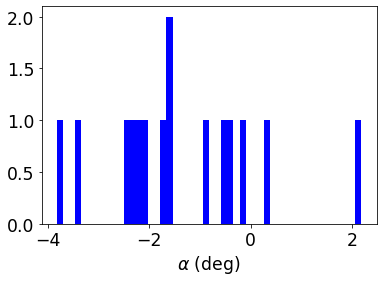

In [60]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
ax.hist(alphadata,bins=50,facecolor="b");
ax.set_xlabel('$\\alpha$ (deg)')

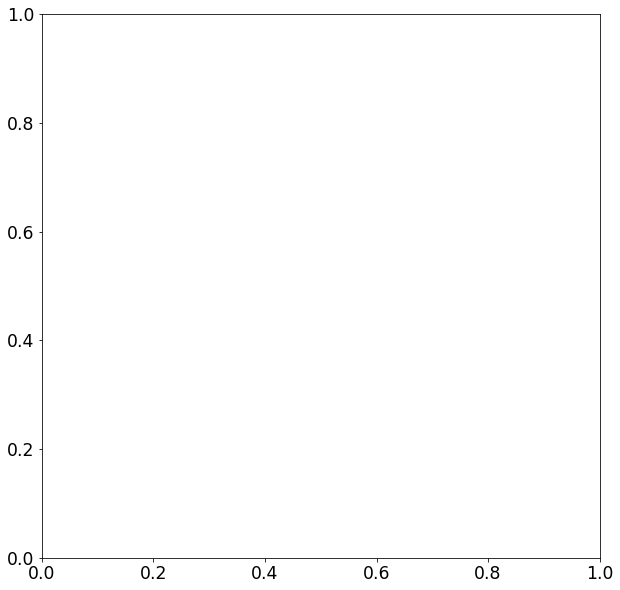

In [69]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

## Dump

In [63]:
d_alpha_model=np.zeros(NumberofPointsData)
theX0=7.5
theY0=0.
thealpha=0
for idx in np.arange(NumberofPointsData):
    
        
    
        XY=np.array([Xdata[idx],Ydata[idx]])
        
        # homothecie according the Z assumption
        xy=XYtoxy(XY,c_Z0)
    
        # rotation according the alpha assumption
        x1y1=xytox1y1(xy,thealpha,theX0,theY0)
        
        thed_alpha=dd_alpha(x1y1[0],x1y1[1])
        d_alpha_model[idx]=thed_alpha

In [67]:
df2=pd.DataFrame()
df2["x"]=Xdata
df2["y"]=Ydata
df2["alpha"]=alphadata
df2["dalpha"]=d_alpha_model

In [68]:
df2

x       y     alpha    dalpha
0    2.592 -11.520 -2.109581  0.975695
1   -8.208   4.776  0.281846 -1.333355
2  -13.080   7.512  2.174746 -2.718085
3   -9.264  -1.128 -0.468667  0.338397
4    7.872  11.112 -3.818171  0.064501
5   -4.296  -5.256 -1.650440  1.100672
6   -8.520 -15.384 -3.342540  4.101656
7   -2.328   6.000 -0.896049 -1.044582
8  -14.112  -9.888 -2.322468  3.707955
9    3.216   1.392 -2.150747 -0.107213
10  -5.952  -6.912 -1.718690  1.639884
11  -8.640 -10.632 -2.452688  2.964765
12  -4.992  -6.024 -1.637692  1.332164
13  -4.872   3.048 -0.436254 -0.673273
14  -9.552   0.600 -0.174151 -0.183145

In [ ]:
alert False

## Keep first hypothesis on rotation angle from data

- keep the average angle

In [ ]:
assummed_angle_0=df.mean()["degré"]
assummed_angle_0

## Parameter grid for parameter search

In [ ]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

### Step 1

#### prior region on angle search

In [ ]:
Ncol=5
Nrow=5
Nalpha=Nrow*Ncol
alpha_range=10
alpha_min=assummed_angle_0-alpha_range
alpha_max=assummed_angle_0+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)
zoom=1

#### Plot the grid for minimum seach

In [ ]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha) # minimum value
the_locchi2min=[] # location of minimum
# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()    # the minimum of chi2
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("CTIO Data : hologram parameters search, step 1",Y=1,fontsize=15)
    
#plt.tight_layout()


In [ ]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [ ]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("$CTIO data, step 1 : \chi^2$ vs holo angle $\\alpha$")

In [ ]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]

In [ ]:
found_angle_1=alpha_values[idx_min]
found_angle_1

In [ ]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [ ]:
X0_found_1=X_ccd[idx_chi2min_x][0]
X0_found_1

In [ ]:
Y0_found_1=Y_ccd[idx_chi2min_y][0]
Y0_found_1

In [ ]:
the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,found_angle_1,c_Z1*zoom,sig=sig_alpha,Npar=2)

#### Plot the result of step 1

In [ ]:
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2, step 1",fontweight="bold",fontsize=25)
ax1.grid(color="w")


#xy1_A=np.array([X0_found_1-c_d1/2,Y0_found_1])
#xy1_B=np.array([X0_found_1+c_d1/2,Y0_found_1])

#xy_A = x1y1toxy(xy1_A,c_alpha0)
#xy_B = x1y1toxy(xy1_B,c_alpha0)

#XY_A = xytoXY(xy_A,c_Z1*zoom)
#XY_B = xytoXY(xy_B,c_Z1*zoom)

ax1.scatter(X0_found_1,Y0_found_1,marker="o",color="y",s=100)
#ax1.scatter(XY_A[0],XY_A[1],marker="o",color="g",s=100)
#ax1.scatter(XY_B[0],XY_B[1],marker="o",color="g",s=100)

ax1.scatter(Xdata,Ydata,marker="o",color="gray")


In [ ]:
Image(filename='figures/amas_ouvert.png') 

### Step 2

In [ ]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [ ]:
Ncol=5
Nrow=5
Nalpha=Nrow*Ncol
alpha_range=5
alpha_min=found_angle_1-alpha_range
alpha_max=found_angle_1+alpha_range
alpha_step=(alpha_max-alpha_min)/Nalpha
alpha_values=np.linspace(alpha_min,alpha_max,Nalpha)
zoom=1

In [ ]:
fig = plt.figure(figsize=(16,16))
the_chi2min=np.zeros(Nalpha)
the_locchi2min=[]

# loop on angle
for idx in np.arange(Nalpha):
    ax1=fig.add_subplot(Nrow,Ncol,idx+1)
    the_chi2=chi2(Xdata,Ydata,alphadata,XX_ccd,YY_ccd,alpha_values[idx],c_Z1*zoom,sig=sig_alpha,Npar=2)
    the_chi2min[idx]=the_chi2.min()
    the_locchi2min.append(np.where(the_chi2==the_chi2.min())) # location of chi2min 
    
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes('right', size='5%', pad=0.05)
    im1=ax1.imshow(the_chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))
    h1 = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=100,colors='w')
    h1b = ax1.contour(X_ccd,Y_ccd,the_chi2,levels=[2.30+the_chi2.min()],colors='r',linewidths=2)
    cbar1=fig.colorbar(im1,cax=cax1,format=cbformat)
    cbar1.ax.get_yaxis().labelpad = 10
    cbar1.ax.set_ylabel('$\\chi^2/NDF$', rotation=90)
    ax1.set_xlabel("X (mm)")
    ax1.set_ylabel("Y (mm)")
    title="$\\alpha$ = {:3.2f}".format(alpha_values[idx])
    ax1.set_title(title,fontweight="bold")
    ax1.grid(color="w")
    
plt.suptitle("CTIO Data : hologram parameters search, step 2",Y=1)
#plt.tight_layout()


In [ ]:
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [ ]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(alpha_values,the_chi2min,'bo-')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\chi^2(\\alpha)$")
ax.set_title("$simulation : \chi^2$ vs holo angle $\\alpha$")

In [ ]:
idx_min=np.where(the_chi2min==the_chi2min.min())[0][0]

In [ ]:
assummed_angle_2=alpha_values[idx_min]
assummed_angle_2

In [ ]:
idx_chi2min_y,idx_chi2min_x=the_locchi2min[idx_min]

In [ ]:
X_ccd[idx_chi2min_x][0]

In [ ]:
Y_ccd[idx_chi2min_y][0]